In [173]:
import pandas as pd
import numpy as np
import math
from datetime import date
from datetime import datetime
import matplotlib as plt



%matplotlib inline  

# set file name  - Confirmed, Deaths, Recovered
# set country of interest

In [149]:
filename = 'Confirmed'
country = 'US'
state = 'NY'

In [121]:
dt = datetime.now().strftime('%Y%m%d')

Covid 19 cases data from CSSE

In [122]:
df = pd.read_csv('covid_data/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-' + filename + '.csv')

In [123]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,93,99,117,129,149,149,197,238,428,566


In [124]:
df[df['Country/Region'] == country]['Province/State'].unique()

array(['Washington', 'New York', 'California', 'Massachusetts',
       'Diamond Princess', 'Grand Princess', 'Georgia', 'Colorado',
       'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Hawaii', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming',
       'Kitsap, WA', 'Solano, CA', 'Santa Cruz, CA', 'Napa, CA',
       'Ventura, CA', 'Worcester, MA', 'Gwinnett, GA', 'DeKalb, GA',
       'Floyd, GA', 'Fayette, GA', 'Gregg, TX', 'Monmouth, NJ',
       'Burlington, NJ', 'Camden, NJ', 'Passaic, NJ'

In [156]:
if (state == 'New York') | (state == 'NY'):        
    df1 = df[(df['Country/Region'] == country) & ((df['Province/State'] == 'New York') | df['Province/State'].str.contains('NY'))]
elif state != 'all':
    df1 = df[(df['Country/Region'] == country) & (df['Province/State'].str.contains(state))]
else:
    df1 = df[df['Country/Region'] == country]
            

In [150]:
(state == 'New York') | (state == 'NY')

True

In [157]:
df2 = pd.melt(df1, id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name = 'period', value_name = 'case_counts')

In [158]:
df3 = df2[df2['case_counts'] > 0]

In [159]:
df3.shape

(37, 6)

In [160]:
df3.to_csv('Clean_' + country + '_' + state + '_' + filename + '_' + dt + '.csv')

In [161]:
df3['case_counts'].agg(sum)

3758

# Local level

In [109]:
zipmap = pd.read_csv('zipcodemap/us-zip-code-latitude-and-longitude.csv', sep = ';')

In [110]:
zipmap.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,71937,Cove,AR,34.398483,-94.39398,-6,1,"34.398483,-94.39398"
1,72044,Edgemont,AR,35.624351,-92.16056,-6,1,"35.624351,-92.16056"
2,56171,Sherburn,MN,43.660847,-94.74357,-6,1,"43.660847,-94.74357"
3,49430,Lamont,MI,43.010337,-85.89754,-5,1,"43.010337,-85.89754"
4,52585,Richland,IA,41.194129,-91.98027,-6,1,"41.194129,-91.98027"


zipcode Lat Long data from
https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/


new = zipmap1['geopoint'].str.split(',', n= 1, expand = True)

zipmap1['Long_z'] = new[0]

zipmap1['Lat_z'] = new[1]

In [70]:
zipmap['tmp'] = 1

In [71]:
df3['tmp'] = 1

/Users/hong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


####  join Case with Map

In [72]:
df4 = df3.merge(zipmap, on = 'tmp',how = 'outer')

In [73]:
df4['Country/Region'].value_counts()

US    45523314
Name: Country/Region, dtype: int64

In [74]:
df4.shape

(45523314, 15)

In [75]:
df4.head()

,Province/State,Country/Region,Lat,Long,period,case_counts,tmp,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,"King County, WA",US,47.6062,-122.3321,1/22/20,1,1,71937,Cove,AR,34.398483,-94.39398,-6,1,"34.398483,-94.39398"
1,"King County, WA",US,47.6062,-122.3321,1/22/20,1,1,72044,Edgemont,AR,35.624351,-92.16056,-6,1,"35.624351,-92.16056"
2,"King County, WA",US,47.6062,-122.3321,1/22/20,1,1,56171,Sherburn,MN,43.660847,-94.74357,-6,1,"43.660847,-94.74357"
3,"King County, WA",US,47.6062,-122.3321,1/22/20,1,1,49430,Lamont,MI,43.010337,-85.89754,-5,1,"43.010337,-85.89754"
4,"King County, WA",US,47.6062,-122.3321,1/22/20,1,1,52585,Richland,IA,41.194129,-91.98027,-6,1,"41.194129,-91.98027"


df4['distance'] = math.sqrt(pow(df4['Lat'] - df4['Latitude'], 2) + pow(df4['Long'] - df4['Longitude'], 2))

In [76]:
df4['distance'] = pow(df4['Lat'] - df4['Latitude'], 2) + pow(df4['Long'] - df4['Longitude'], 2)

In [77]:
df5 = df4[df4['distance'] <2.89]

In [78]:
df5.shape

(858188, 16)

In [79]:
df4.shape

(45523314, 16)

In [80]:
df5.to_csv('zipaffected_' + filename + '_' + dt + '.csv')

# National Level

In [189]:
df_national = df3.groupby(['period'])['case_counts'].agg('sum')

In [190]:
df_national = df_national.sort_values()

In [184]:
df_national.to_csv(country + '_' + state + '_'+ filename + "_" + dt + "_national.csv", header = True, index = True)

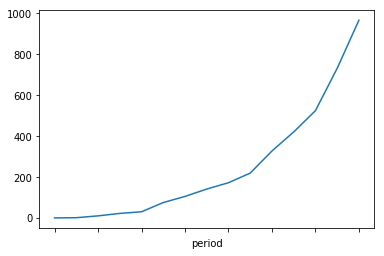

In [193]:
df_national.plot()

In [197]:
df_national

period
3/2/20       1
3/3/20       2
3/4/20      11
3/5/20      23
3/6/20      31
3/7/20      76
3/8/20     106
3/9/20     142
3/10/20    173
3/11/20    220
3/12/20    328
3/13/20    421
3/14/20    525
3/15/20    732
3/16/20    967
Name: case_counts, dtype: int64

In [203]:
df3['Province/State'].unique()

array(['New York County, NY', 'Westchester County, NY',
       'Nassau County, NY', 'Rockland County, NY', 'Saratoga County, NY',
       'Suffolk County, NY', 'Ulster County, NY', 'New York'],
      dtype=object)